# **HEY README, THIS IS OPENING!**

Hello everyone, welcome to my notebook. Today, I'll be diving into this dataset and providing some insights on predicting obesity levels using machine learning. So, let's get ready and hang on tight! But before we delve into the analysis, let's first introduce our data. 

This dataset is sourced from the UCI Machine Learning Repository and contains information on obesity levels based on lifestyle, height, weight, and so on. Original source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition. 

The dataset includes columns such as:

1. Frequent consumption of high-caloric food (FAVC) 🍕🍔
2. Frequency of consumption of vegetables (FCVC)🥕
3. Number of main meals (NCP)🔢
4. Consumption of food between meals (CAEC)🍇
5. Consumption of water daily (CH20)💧
6. Consumption of alcohol (CALC)🍷
7. Smoking or not (SMOKE)🚬
The attributes related to the physical condition are:

1. Calories consumption monitoring (SCC)⌚
2. Physical activity frequency (FAF)🏂
3. Time using technology devices (TUE)🤳
4. Transportation used (MTRANS)🚉

Other variables obtained are:

1. Gender
2. Age
3. Height
4. Weight

Finally, all the data has been labeled, and the class variable "NObesity" has been created. It includes the following values:

1. Insufficient Weight
2. Normal Weight
3. Overweight Level I
4. Overweight Level II
5. Obesity Type I
6. Obesity Type II
7. Obesity Type III

For a complete description of the dataset, you can click here: [link](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)
Ah, i also make a simple app with this, so here's the link if you want to give it a try!

https://predict-obese.streamlit.app/


Before we jump into analysis, let's import library that we'll use first, those are our lovely libraries: pandas, matplotlib, seaborn, and also numpy!

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# not to forget, we'll also hide warning on our code
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [48]:
# Read the data
df = pd.read_csv('/kaggle/input/obesity-level-by-uci-datasets/obesity.csv')
# Let's take a look with our data
df 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# **Data Cleaning**
Let's check the missing values and rename columns to make our analysis easier.

In [49]:
# Check missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [50]:
#Check data types
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

It's great that our data is complete and in the correct format. Since we're focusing on predicting obesity levels and hopefully we can create an app, we should filter out some columns to limit the number of features the user needs to enter. Based on that consideration, we will include the following columns:

1. Gender
2. Age
3. Height
4. Weight
5. Family History with Overweight
6. Number of main meals (NCP)
7. Physical Activity Frequency (per week, FAF)

By using these selected columns, we can streamline the input process for the user.

In [51]:
# Rename columns that we'll use
df.rename(columns={'FAVC':'Calories','FAF':'Activity','NCP':'Meals','NObeyesdad':'Obesity Levels'}, inplace=True)
#
df

,Gender,Age,Height,Weight,family_history_with_overweight,Calories,FCVC,Meals,CAEC,SMOKE,CH2O,SCC,Activity,TUE,CALC,MTRANS,Obesity Levels
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [52]:
#filtered out columns that we'll use
df = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight','Meals',
         'Activity',
         'SMOKE','Obesity Levels']]
df

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels
0,Female,21.000000,1.620000,64.000000,yes,3.0,0.000000,no,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,3.0,3.000000,yes,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,3.0,2.000000,no,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,3.0,2.000000,no,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,1.0,0.000000,no,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,3.0,1.676269,no,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,3.0,1.341390,no,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,3.0,1.414209,no,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,3.0,1.139107,no,Obesity_Type_III


# **Data Analysis and Data Visualization**
Let's get summary with our data

In [53]:
#Summary of our data
df.describe()

,Age,Height,Weight,Meals,Activity
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.685628,1.010298
std,6.345968,0.093305,26.191172,0.778039,0.850592
min,14.000000,1.450000,39.000000,1.000000,0.000000
25%,19.947192,1.630000,65.473343,2.658738,0.124505
50%,22.777890,1.700499,83.000000,3.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,1.666678
max,61.000000,1.980000,173.000000,4.000000,3.000000


The responders in our dataset have varying characteristics based on age, height, and weight. Here are the ranges observed:

- Age: The age of responders ranges from 14 to 61 years old.
- Height: The height of responders ranges from 1.48 meters to 1.98 meters.
- Weight: The weight of responders ranges from 39 kg to 173 kg.
- Activit: The Activity of responders ranges from 1 day per week to 3 days per week
These ranges give us an understanding of the diversity within the dataset and provide insights into the different profiles of the individuals included.
From the summary, it appears that the weight variable in the dataset exhibits a high variation. This is indicated by a standard deviation of 26, which suggests that the weight data points are spread out over a wide range. The high standard deviation indicates that there is significant diversity in the weights of the responders, implying that there may be a considerable difference in weight among the individuals included in the dataset.

Lets's take a look with the visualization! But, due to interactive purposes, we'll use plotly instead of matplotlib or seaborn.

In [54]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'Meals', 'Activity', 'SMOKE', 'Obesity Levels'],
      dtype='object')

In [55]:
import plotly.graph_objects as go

# Create distribution with box plot for each column in the DataFrame
fig = go.Figure()

# Distribution for the 'Age' column
fig.add_trace(go.Box(x=df['Age'], name='Age', marker_color='royalblue'))

# Distribution for the 'Height' column
fig.add_trace(go.Box(x=df['Height'], name='Height', marker_color='royalblue'))

# Distribution for the 'Weight' column
fig.add_trace(go.Box(x=df['Weight'], name='Weight', marker_color='royalblue'))

# Distribution for the 'Activity' column
fig.add_trace(go.Box(x=df['Activity'], name='Activity', marker_color='royalblue'))

# Update layout
fig.update_layout(title='Distributions of Columns',
                  xaxis=dict(title='Values'),
                  yaxis=dict(title='Columns'),
                  template='plotly_dark')

# Display the plot
fig.show()


In [56]:
#Let's take a look with our data again, don't get bored okay!
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels
0,Female,21.0,1.62,64.0,yes,3.0,0.0,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,3.0,3.0,yes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,3.0,2.0,no,Normal_Weight
3,Male,27.0,1.80,87.0,no,3.0,2.0,no,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,1.0,0.0,no,Overweight_Level_II


Alright, let's compare the number of male and female between responders, also the responders who have history of overweight. Let's also compare the number of responder who smoke and those who don't. By analyzing this, we can gain insights into the smoking habits of the individuals in the dataset.
We will also compare the obesity levels between responders. But, to make our visualization interactive, we'll use plotly instead of matplotlib!

In [57]:
# Count the number of male and female in the 'gender' column
gender_counts = df['Gender'].value_counts().sort_values(ascending=True)

# Count the number of responders who have family history with overweight
famhist_counts = df['family_history_with_overweight'].value_counts().sort_values(ascending=True)

# Count the number of 'yes' and 'no' in the 'SMOKE' column
smoke_counts = df['SMOKE'].value_counts().sort_values(ascending=True)

# Count the number of each obesity level in the 'Obesity Levels' column
obesity_counts = df['Obesity Levels'].value_counts().sort_values(ascending=True)

# Creating a bar chart to compare the amounts of male and female  
fig = go.Figure(data=[go.Bar(y=gender_counts.index, x=gender_counts.values, orientation='h', marker_color='royalblue')])
fig.update_layout(title='Amount of Gender Comparison', xaxis_title='Amount', yaxis_title='Male or Female', template='plotly_dark')
fig.show()

# Creating a bar chart to compare responders who have family history of overweight and who don't
fig = go.Figure(data=[go.Bar(y=famhist_counts.index, x=famhist_counts.values, orientation='h', marker_color='royalblue')])
fig.update_layout(title='Family History of Overweight', xaxis_title='Amount', yaxis_title='Yes or No', template='plotly_dark')
fig.show()


# Creating a bar chart to visualize the smoking categories
fig = go.Figure(data=[go.Bar(y=smoke_counts.index, x=smoke_counts.values, orientation='h', marker_color='royalblue')])
fig.update_layout(title='Smoking Categories between Responders', xaxis_title='Amount', yaxis_title='Smoke or Not', template='plotly_dark')
fig.show()

# Creating a bar chart to compare obesity levels between responders
fig = go.Figure(data=[go.Bar(y=obesity_counts.index, x=obesity_counts.values, orientation='h', marker_color='royalblue')])
fig.update_layout(title='Obesity Levels among Responders', xaxis_title='Amount', yaxis_title='Obesity Level', template='plotly_dark')
fig.show()


From the visualization above, we can observe several insights regarding the majority of the responders:

1. Gender: The majority of the responders are male, indicating that there is a higher representation of males in the dataset compared to females.
2. Smoking Habits: A significant number of responders are non-smokers, suggesting that a large portion of the individuals in the dataset do not smoke.
3. Family History of Overweight: Most responders have a family history of overweight, indicating that a considerable number of individuals in the dataset have a genetic predisposition to overweight conditions.
4. Obesity Type: The majority of responders are classified as having Obesity Type 1, suggesting that this particular type of obesity is prevalent among the individuals in the dataset.

These observations provide valuable insights into the characteristics and trends within the dataset. However, it's important to note that these conclusions are based on the provided information and visualizations. Further analysis and exploration of the data may reveal additional insights and patterns. 

Let's move to machine learning or prediction session!

# **Machine Learning Section**
Alright, folks, it's time to dive into our machine learning session. But before we get started, we need to transform some non-numeric values in our data into numeric format. This will allow us to apply machine learning techniques effectively.

For this session, we will focus on four specific models:

1. **K-Nearest Neighbors (KNN)**
2. **Decision Tree**
3. **Random Forest**
4. **Support Vector Machines (SVM)**

To optimize our models, we will perform **GridSearch**, which helps us find the best possible outcomes for our input.

In [58]:
# Change the categorical data forom yes to 1 and no to 0
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes':1,'no':0})
df['SMOKE'] = df['SMOKE'].replace({'no':0,'yes':1})


In [59]:
# Split the data info features (X) and Target (Y)
X = df.drop('Obesity Levels', axis=1)
Y = df['Obesity Levels']

In [60]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, shuffle=True, random_state=42, 
                                                    stratify=Y)

Alright, let's try our first model to predict obesity level, K-Nearest Neighborhors (KNN)!

# **1. KNN**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
report = classification_report(y_test, y_pred_test, digits=4)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9250    0.9024    0.9136        82
      Normal_Weight     0.6036    0.7791    0.6802        86
     Obesity_Type_I     0.8462    0.8302    0.8381       106
    Obesity_Type_II     0.9247    0.9663    0.9451        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.8714    0.7011    0.7771        87
Overweight_Level_II     0.7500    0.6897    0.7186        87

           accuracy                         0.8391       634
          macro avg     0.8458    0.8369    0.8382       634
       weighted avg     0.8483    0.8391    0.8407       634



Let's see the confusion matrix to see the overall performance of our model

So, overall the accuracy of our model is 0.8391, let's perform GridSearch to optimize our model.

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__n_neighbors': [i for i in range(3,10)],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Best Score: 0.8693234050376908


After we input some parameters to GridSearch, we get the best possible model based on our input are above with score 0.86. For me, that's good, but let's optimize it a little bit.

As we recall, our dataset includes variables such as Height, Weight, Age, Meals, and Activity. **The scales of these variables vary considerably**. For instance, Age ranges from 14 to 61, Weight ranges from 39 to 174, while Activity and Meals only range from 1 to 3. To address this disparity and ensure that all variables are on a consistent scale, **we will employ a technique called MinMaxScaler**. MinMaxScaler will rescale the variables so that they fall within the range of -1 to 1. 

In [63]:
from sklearn.compose import ColumnTransformer

numeric_features = ['Age', 'Height', 'Weight','Meals', 'Activity']
categorical_features = ['Gender', 'family_history_with_overweight', 'SMOKE', 'Obesity Levels']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

best_model_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
])

best_model_knn.fit(X_train, y_train)
y_pred = best_model_knn.predict(X_test)
report_2 = classification_report(y_test, y_pred, digits=4)
print(report_2)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9744    0.9268    0.9500        82
      Normal_Weight     0.7879    0.9070    0.8432        86
     Obesity_Type_I     0.9143    0.9057    0.9100       106
    Obesity_Type_II     0.9663    0.9663    0.9663        89
   Obesity_Type_III     1.0000    1.0000    1.0000        97
 Overweight_Level_I     0.8625    0.7931    0.8263        87
Overweight_Level_II     0.8140    0.8046    0.8092        87

           accuracy                         0.9022       634
          macro avg     0.9028    0.9005    0.9007       634
       weighted avg     0.9044    0.9022    0.9025       634



After Scaling we get accuracy 0.9022 and we named our model as **best_model_knn**. Let's look at confusian matrix to know the overall performance of our model.


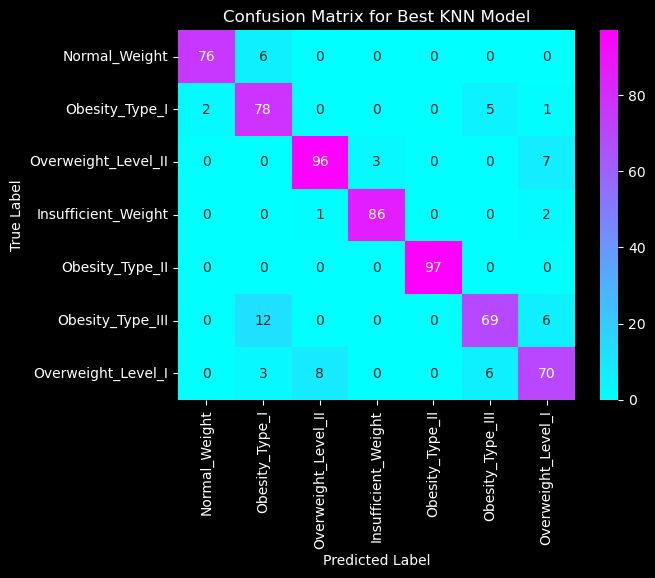

In [64]:
# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
Labels = y_test.unique()
# Show Confusion Matrix
sns.heatmap(cm, annot=True, cmap='cool', fmt='d', xticklabels=Labels, yticklabels=Labels)

plt.title('Confusion Matrix for Best KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Let's also look at our model prediction, for that we copy our original dataframe and make prediction with **best_model_knn**.

In [65]:
# Copy original dataframe for knn prediction
df_1 = df.copy()
df_1_feature = df_1.drop('Obesity Levels', axis=1)

In [66]:
# Make new column KNN - Prediction
df_1['KNN - Prediction '] = best_model_knn.predict(df_1_feature)
df_1

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels,KNN - Prediction
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,Obesity_Type_III


# **2. Decision Tree**

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=41, max_depth=8)
tree.fit(X_train, y_train)
y_pred_2 = tree.predict(X_test)
report_3 = classification_report(y_test, y_pred_2, digits=4)
print(report_3)

                     precision    recall  f1-score   support

Insufficient_Weight     0.9241    0.8902    0.9068        82
      Normal_Weight     0.8608    0.7907    0.8242        86
     Obesity_Type_I     0.9279    0.9717    0.9493       106
    Obesity_Type_II     0.9882    0.9438    0.9655        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.8557    0.9540    0.9022        87
Overweight_Level_II     0.9425    0.9425    0.9425        87

           accuracy                         0.9290       634
          macro avg     0.9285    0.9261    0.9265       634
       weighted avg     0.9299    0.9290    0.9287       634



Wow, at first try we'll instantly get accuracy 0.929!, let's optimize it then!

In [68]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Perform grid search using cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
# Assign the best tree model to the variable best_tree_model
best_tree_model = best_estimator
# Use the best estimator to make predictions on the test set
y_pred_tree = best_estimator.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred_tree, digits=4)
print(report)
print("Best parameters:", best_params)


                     precision    recall  f1-score   support

Insufficient_Weight     0.9241    0.8902    0.9068        82
      Normal_Weight     0.8488    0.8488    0.8488        86
     Obesity_Type_I     0.9196    0.9717    0.9450       106
    Obesity_Type_II     0.9882    0.9438    0.9655        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.9111    0.9425    0.9266        87
Overweight_Level_II     0.9651    0.9540    0.9595        87

           accuracy                         0.9369       634
          macro avg     0.9367    0.9344    0.9353       634
       weighted avg     0.9376    0.9369    0.9370       634

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


Based on the parameters we used, we achieved an impressive accuracy of **0.9369 for our model**. While we can explore different input parameters, considering the high accuracy we've obtained, there may not be a need to make further adjustments. Our model is performing well, so we can leave it as it is.

Let see what our best model can do to predict. Let see the confusian matrix as well.

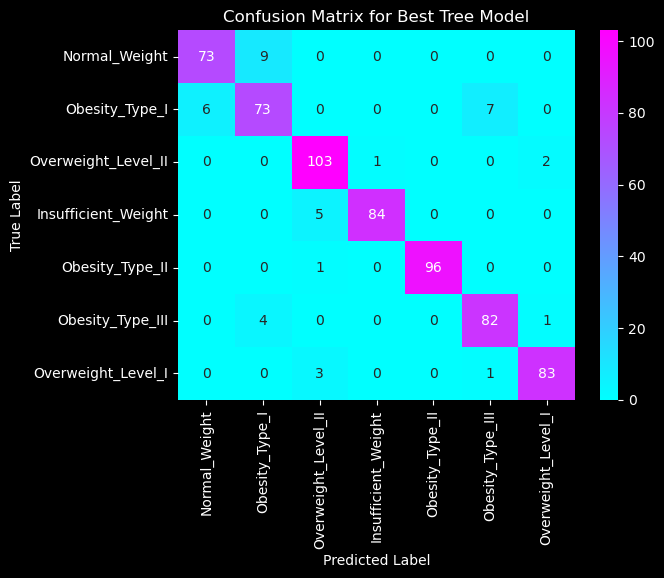

In [69]:
# Creating Confusion Matrix
cm_2 = confusion_matrix(y_test, y_pred_tree)
Labels = y_test.unique()
# Show Confusion Matrix
sns.heatmap(cm_2, annot=True, cmap='cool', fmt='d', xticklabels=Labels, yticklabels=Labels)
plt.title('Confusion Matrix for Best Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [70]:
df_2 = df.copy()
df_2_feature = df_2.drop('Obesity Levels', axis = 1)
df_2['Tree - Prediction'] = best_tree_model.predict(df_2_feature)
df_2

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels,Tree - Prediction
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,Obesity_Type_III


# **3. Random Forest**
To shorten the time, we will directly use GridSearch.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the RFC model
rfc = RandomForestClassifier(random_state=41)

# Define the grid parameters to be tested
param_grid = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [None, 5, 10],
    'rfc__min_samples_split': [2, 5, 10]
}

# Create a pipeline with scaler and RFC model
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rfc', rfc)
])

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model_rfc = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_rfc = best_model_rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_rfc, digits=4)
print(best_model_rfc)
print(report)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc',
                 RandomForestClassifier(n_estimators=200, random_state=41))])
                     precision    recall  f1-score   support

Insufficient_Weight     0.9870    0.9268    0.9560        82
      Normal_Weight     0.8182    0.9419    0.8757        86
     Obesity_Type_I     0.9533    0.9623    0.9577       106
    Obesity_Type_II     1.0000    0.9663    0.9829        89
   Obesity_Type_III     1.0000    0.9897    0.9948        97
 Overweight_Level_I     0.9294    0.9080    0.9186        87
Overweight_Level_II     0.9643    0.9310    0.9474        87

           accuracy                         0.9479       634
          macro avg     0.9503    0.9466    0.9476       634
       weighted avg     0.9513    0.9479    0.9488       634



Let's see the confusion matrix and our best random forest  model prediction.

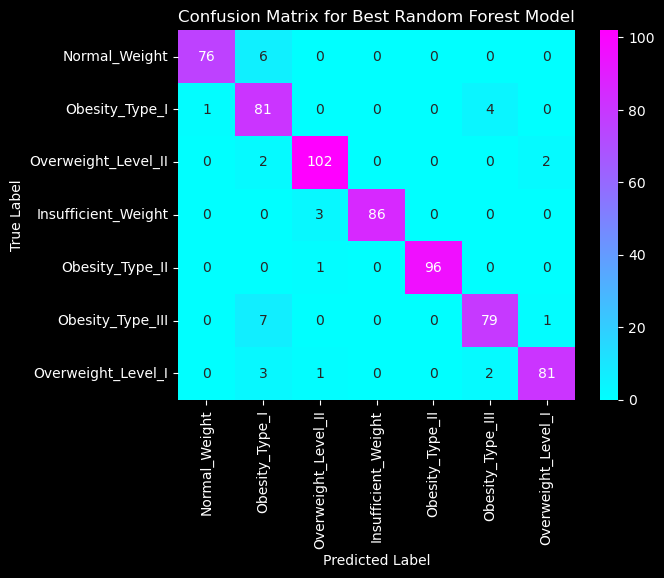

In [72]:
# Creating Confusion Matrix
cm_3 = confusion_matrix(y_test, y_pred_rfc)
Labels = y_test.unique()
# Show Confusion Matrix
sns.heatmap(cm_3, annot=True, cmap='cool', fmt='d', xticklabels=Labels, yticklabels=Labels)

plt.title('Confusion Matrix for Best Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [73]:
df_3 = df.copy()
df_3_feature = df_3.drop('Obesity Levels', axis = 1)
df_3['RFC - Prediction'] = best_model_rfc.predict(df_3_feature)
df_3

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels,RFC - Prediction
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,Obesity_Type_III


 # **4. Support Vector Machines (SVM)**
 Let's see at our latest model on this section, SVM! To shorten time, we'll also directly implement GridSearch!

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Initialize the SVC model
svm = SVC(random_state=41)

# Define the grid parameters to be tested
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Create a pipeline with scaler and SVC model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=41))
])

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model_SVM = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_SVM = best_model_SVM.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM, digits=4)
print(report)
print(best_model_SVM)


                     precision    recall  f1-score   support

Insufficient_Weight     0.9176    0.9512    0.9341        82
      Normal_Weight     0.8861    0.8140    0.8485        86
     Obesity_Type_I     0.9346    0.9434    0.9390       106
    Obesity_Type_II     0.9884    0.9551    0.9714        89
   Obesity_Type_III     1.0000    1.0000    1.0000        97
 Overweight_Level_I     0.8105    0.8851    0.8462        87
Overweight_Level_II     0.9176    0.8966    0.9070        87

           accuracy                         0.9227       634
          macro avg     0.9221    0.9207    0.9209       634
       weighted avg     0.9240    0.9227    0.9228       634

SVC(C=10, kernel='linear', random_state=41)


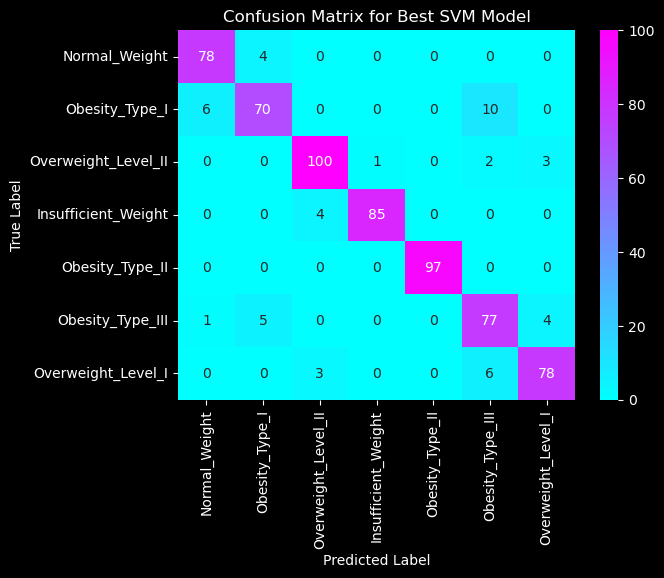

In [75]:
# Creating Confusion Matrix
cm_4 = confusion_matrix(y_test, y_pred_SVM)
Labels = y_test.unique()
# Show Confusion Matrix
sns.heatmap(cm_4, annot=True, cmap='cool', fmt='d', xticklabels=Labels, yticklabels=Labels)

plt.title('Confusion Matrix for Best SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [76]:
df_4 = df.copy()
df_4_features = df_4.drop('Obesity Levels', axis = 1)
df_4['SVM - Prediction'] = best_model_SVM.predict(df_4_features)
df_4

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels,SVM - Prediction
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,Overweight_Level_I
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,Obesity_Type_III


Alright, based on our previous models, we'll choose random forest since it's has the highest accuracy between them.

# **Additional Session, BMI!**
We often hear about body mass index (BMI) and may have already used it. BMI is commonly used to assess whether our weight is excessive or insufficient. For those who are less familiar, BMI is calculated by dividing body weight (in kilograms) by the square of height (in meters).

Based on the calculated BMI, we can determine if we are underweight, normal weight, overweight, or obese according to the following commonly used scale:

1. **Underweight**: BMI < 18.5
2. **Normal weight**: BMI 18.5 - 24.9
3. **Overweight**: BMI 25 - 29.9
4. **Obesity**: BMI ≥ 30

These categories help us evaluate our weight status and understand if we fall within a healthy range or if there is a need for attention and possible lifestyle adjustments. 
Based on the information above, we will compare whether the categorization of obesity based on BMI aligns with the actual outcomes from our data or not.

In [77]:
# Make a new column BMI
df['BMI'] = df['Weight']/(df['Height']**2)
df

,Gender,Age,Height,Weight,family_history_with_overweight,Meals,Activity,SMOKE,Obesity Levels,BMI
0,0,21.000000,1.620000,64.000000,1,3.0,0.000000,0,Normal_Weight,24.386526
1,0,21.000000,1.520000,56.000000,1,3.0,3.000000,1,Normal_Weight,24.238227
2,1,23.000000,1.800000,77.000000,1,3.0,2.000000,0,Normal_Weight,23.765432
3,1,27.000000,1.800000,87.000000,0,3.0,2.000000,0,Overweight_Level_I,26.851852
4,1,22.000000,1.780000,89.800000,0,1.0,0.000000,0,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,3.0,1.676269,0,Obesity_Type_III,44.901475
2107,0,21.982942,1.748584,133.742943,1,3.0,1.341390,0,Obesity_Type_III,43.741923
2108,0,22.524036,1.752206,133.689352,1,3.0,1.414209,0,Obesity_Type_III,43.543817
2109,0,24.361936,1.739450,133.346641,1,3.0,1.139107,0,Obesity_Type_III,44.071535


In [78]:
# Create dataframe for BMI categories, df_weight_1 for BMI<18.5, and so on
df_weight_1 = df[df['BMI']<18.5]
# Get the obesity levels for BMI<18.5
df_weight_1['Obesity Levels'].unique()

array(['Insufficient_Weight', 'Normal_Weight'], dtype=object)

It seems that with BMI<18.5, for obesity levels we get Insufficient Weight (align with BMI criteria) and normal weight (almost align with BMI criteria)
so, we will compare both.

In [79]:

# count normal and insufficient weight for BMI<18.5
a_1 = df_weight_1['Obesity Levels'].value_counts()

fig = go.Figure(data=[go.Bar(x=a_1.index, y=a_1)])

fig.update_layout(
    title='Insufficient Weight and Normal Weight for BMI<18.5',
    xaxis=dict(title='Weight Categories'),
    yaxis=dict(title='Amount'),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.show()


Well, maybe we can say that the BMI criteria aligns with our obesity levels! 😅 Next, let's move on to the other criteria. However, to save time, we'll explore the remaining three together.

In [80]:
# For normal weight
df_weight_2 = df[(df['BMI'] >= 18.5) & (df['BMI'] < 25)]

# For overweight
df_weight_3 = df[(df['BMI'] >= 25) & (df['BMI'] < 29.9)]

# For obesity
df_weight_4 = df[df['BMI'] >= 30]

In [81]:
# Create label 
A = ['insufficient', 'normal', 'overweight', 'obesity']

for i in range(2, 5):
    # Create categories
    a_i = globals()[f"df_weight_{i}"]['Obesity Levels'].value_counts()

    # Create bar chart to compare categories
    fig = go.Figure(data=[go.Bar(x=a_i.index, y=a_i)])

    fig.update_layout(
        title='Categories for ' + A[i-1] + ' Weight (BMI)',
        xaxis=dict(title='Weight Categories'),
        yaxis=dict(title='Amount'),
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color='white')
    )

    fig.show()


As we can observe, the BMI aligns with our actual data in most cases. Since our predictions have shown to be quite accurate compared to the actual data, **it's highly likely that the BMI will also align with the results from our predictions.**
So, if you use my simple app for predictions and find that the results don't exactly match the BMI criteria, don't worry! It's completely normal. Remember, **my app takes into consideration not only weight and height but also lifestyle factors when making determinations.**
I encourage you all to give it a try! Feel free to test it out here:
https://predict-obese.streamlit.app/

That wraps it up, folks! Thank you for taking the time to read, and see you around! 😎

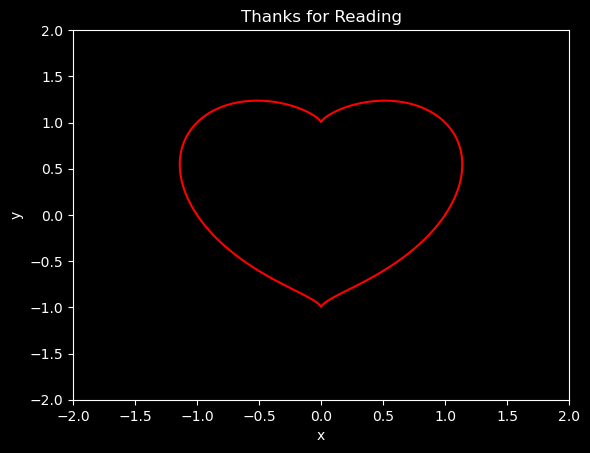

In [82]:
plt.style.use('dark_background')
x = np.linspace(-2, 2, 800)
y = np.linspace(-2, 2, 800)
x, y = np.meshgrid(x, y)


f = (x**2 + y**2 - 1)**3 - x**2 * y**3


plt.contour(x, y, f, [0], colors='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Thanks for Reading')
plt.grid(False)
plt.show()